# What Is Exploratory Data Analysis

Exploratory Data Analysis is an approach in analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

EDA assists Data science professionals in various ways:-

1. Getting a better understanding of data

2. Identifying various data patterns

3. Getting a better understanding of the problem statement



 

# STUDENT PERFORMANCES ANALYSIS

1.Reading and Understanding the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
df_main = pd.read_csv(r'C:\Users\shri\Downloads\StudentsPerformance.csv')

In [3]:
df_main.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df_main.shape

(1000, 8)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#missing values
df_main.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

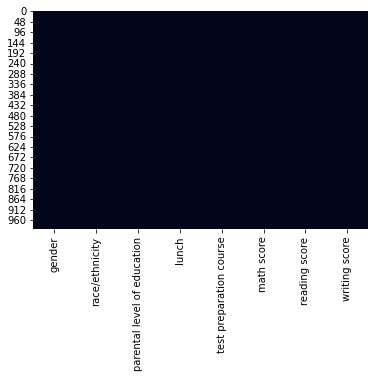

In [7]:
sns.heatmap(df_main.isnull(), cbar=False)

In [8]:
#numerical stats
df_main.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Data Analysis (EDA)¶


In [9]:
df_main.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<AxesSubplot:>

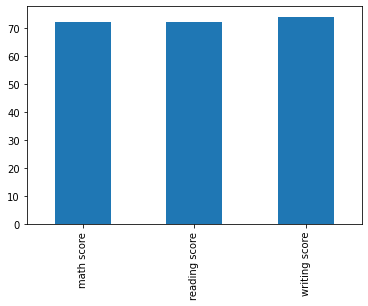

In [10]:
df = df_main.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course',], axis = 1)
df.iloc[0].plot(kind='bar')

1.Writing score of students is higher than math and reading score

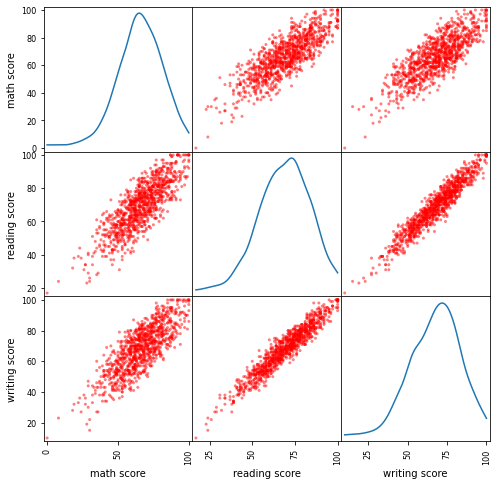

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_main, figsize= (8,8), diagonal='kde', color = 'r')
plt.show()

1.maths score ,reading score and writing score are varying linearly.


2.It is almost clear than there is no skewness in the target score (maths,reading and writing).

# comparison of all other attributes with respect to Writing  Marks


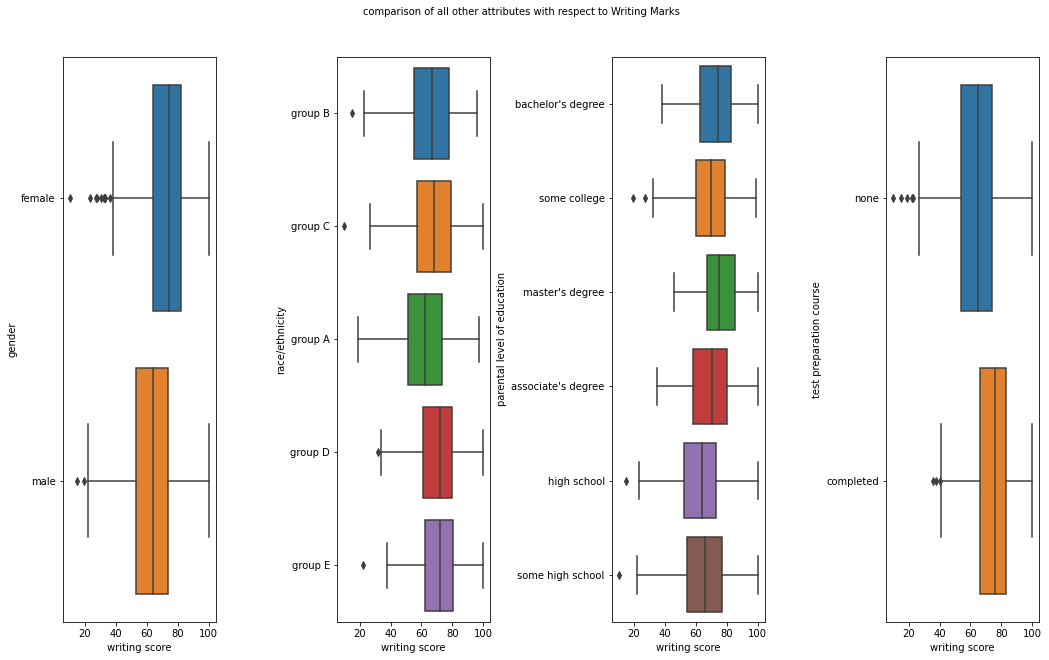

In [12]:
fig = plt.figure(figsize=[16,10])
fig.tight_layout(pad=5.0)
plt.subplot(1, 4, 1)
sns.boxplot(x='writing score', y='gender', data=df_main)

plt.subplot(1, 4, 2)
sns.boxplot(x='writing score', y='race/ethnicity', data=df_main)

plt.subplot(1, 4, 3)
fig.tight_layout(pad=6.0)
sns.boxplot(x='writing score', y='parental level of education', data=df_main)

plt.subplot(1, 4, 4)
sns.boxplot(x='writing score', y= 'test preparation course', data=df_main)


plt.suptitle('comparison of all other attributes with respect to Writing Marks ', fontsize = 10)
plt.show()

1. outliers are very less  here

# Maximum and Minimum scorer


In [13]:
df_main['writing score'].max()

100

In [14]:
df_main['writing score'].value_counts().max()

35

In [15]:
df_main[df_main['writing score']==100].sort_values(ascending=False,by='writing score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


1.  In writing,number of females got higher marks than number of males.

In [16]:
df_main['writing score'].min()

10

In [17]:
df_main['writing score'].value_counts().min()

1

In [18]:
df_main[df_main['writing score']==10].sort_values(ascending=False,by='writing score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


# comparison of all other attributes with respect to Maths Marks

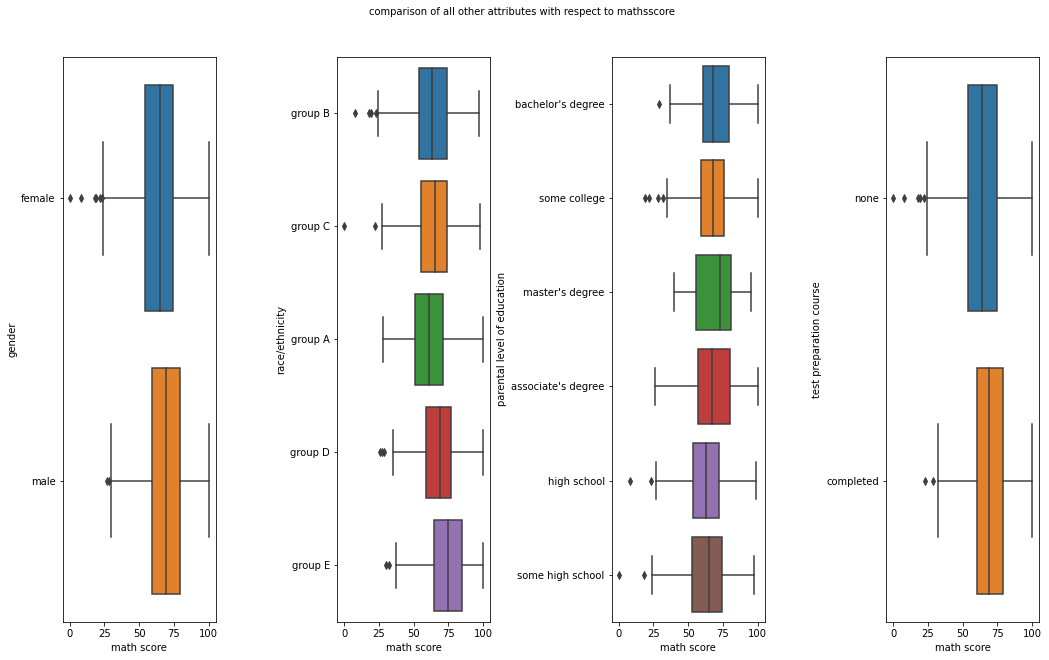

In [19]:
fig = plt.figure(figsize=[16,10])
fig.tight_layout(pad=5.0)
plt.subplot(1, 4, 1)
sns.boxplot(x='math score', y='gender', data=df_main)

plt.subplot(1, 4, 2)
sns.boxplot(x='math score', y='race/ethnicity', data=df_main)

plt.subplot(1, 4, 3)
fig.tight_layout(pad=6.0)
sns.boxplot(x='math score', y='parental level of education', data=df_main)

plt.subplot(1, 4, 4)
sns.boxplot(x='math score', y= 'test preparation course', data=df_main)


plt.suptitle('comparison of all other attributes with respect to mathsscore ', fontsize = 10)
plt.show()

1.In Maths, outliers are much higher than writing score 

# Maximum and Minimum scorer

In [20]:
df_main['math score'].max()

100

In [21]:
df_main['math score'].value_counts().max()

36

In [22]:
df_main[df_main['math score']==100].sort_values(ascending=False,by='math score').head(36)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [23]:
df_main['math score'].min()

0

In [24]:
df_main['math score'].value_counts().min()

1

In [25]:
df_main[df_main['math score']==0].sort_values(ascending=False,by='math score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


# comparison of all other attributes with respect to Reading Marks¶

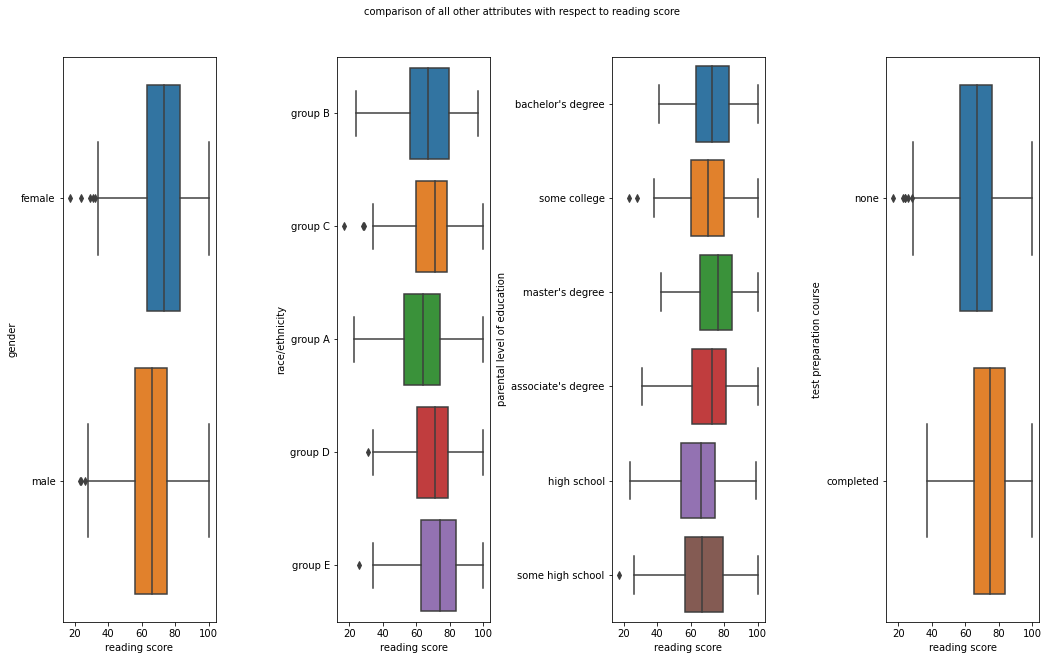

In [26]:
fig = plt.figure(figsize=[16,10])
fig.tight_layout(pad=5.0)
plt.subplot(1, 4, 1)
sns.boxplot(x='reading score', y='gender', data=df_main)

plt.subplot(1, 4, 2)
sns.boxplot(x='reading score', y='race/ethnicity', data=df_main)

plt.subplot(1, 4, 3)
fig.tight_layout(pad=6.0)
sns.boxplot(x='reading score', y='parental level of education', data=df_main)

plt.subplot(1, 4, 4)
sns.boxplot(x='reading score', y= 'test preparation course', data=df_main)


plt.suptitle('comparison of all other attributes with respect to reading score ', fontsize = 10)
plt.show()

1.In reading, outliers is very less

# Maximum and Minimum scorer


In [27]:
df_main['reading score'].max()

100

In [28]:
df_main['reading score'].value_counts().max()

34

In [29]:
df_main[df_main['reading score']==100].sort_values(ascending=False,by='reading score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
962,female,group E,associate's degree,standard,none,100,100,100
957,female,group D,master's degree,standard,none,92,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
886,female,group E,associate's degree,standard,completed,93,100,95
712,female,group D,some college,standard,none,98,100,99
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100


In reading,number of females got higher marks than number of males

In [30]:
df_main['reading score'].min()

17

In [31]:
df_main['reading score'].value_counts().min()

1

In [32]:
df_main[df_main['reading score']==17].sort_values(ascending=False,by='reading score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


# Number of students who got maximum scores whose count varies :math score>writing score>reading score


# Correlation

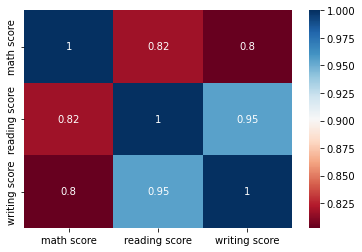

In [33]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

1.Reading score is more correlated with writing score than maths score.
2.Maths score is more correlated with  reading score than writing score.

# Inferential statistics

In [34]:
avg_w=round(df_main['writing score'].mean())
avg_w

68

In [35]:
total_students = df_main.shape[0]
students_score_more_than_average = df_main[df_main['writing score'] > avg_w].shape[0]

probability_of_students_scoring_more_than_average_in_writing = (students_score_more_than_average/total_students)*100
print("Probability of Students Scoring more than average marks in writing :", probability_of_students_scoring_more_than_average_in_writing)

Probability of Students Scoring more than average marks in writing : 51.2


In [36]:
avg_m=round(df_main['math score'].mean())
avg_m

66

In [37]:
total_students = df_main.shape[0]
students_score_more_than_average = df_main[df_main['math score'] > avg_m].shape[0]

probability_of_students_scoring_more_than_average_in_maths = (students_score_more_than_average/total_students)*100
print("Probability of Students Scoring more than average marks in maths :", probability_of_students_scoring_more_than_average_in_maths)

Probability of Students Scoring more than average marks in maths : 49.3


In [39]:
avg_r=round(df_main['reading score'].mean())
avg_r

69

In [40]:
total_students = df_main.shape[0]
students_score_more_than_average = df_main[df_main['reading score'] > avg_r].shape[0]

probability_of_students_scoring_more_than_average_in_reading = (students_score_more_than_average/total_students)*100
print("Probability of Students Scoring more than average marks in reading :", probability_of_students_scoring_more_than_average_in_reading)

Probability of Students Scoring more than average marks in reading : 51.300000000000004


# 1.Average score varies:reading> writing>math
 

# 2.Probability of Students Scoring more than average marks varies:reading>writing>maths

In [41]:
total_students = df_main.shape[0]
number_of_students_passing_in_all_subjects =df_main[(df_main['math score'] > 40) &
                                                  (df_main['writing score'] > 40) & 
                                                  (df_main['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


# The Probability of Students Passing in all the Subjects is 93.90 %

In [42]:
 total_students = df_main.shape[0]
number_of_students_failing_in_all_subjects =df_main[(df_main['math score'] <= 40) &
                                                  (df_main['writing score'] <=  40) & 
                                                  (df_main['reading score'] <=  40)].shape[0]
probability_of_students_failing_in_all_the_subjects = (number_of_students_failing_in_all_subjects/total_students)*100
print("The Probability of Students failing in all the Subjects is {0:.2f} %".format(probability_of_students_failing_in_all_the_subjects))

The Probability of Students failing in all the Subjects is 1.80 %


# The Probability of Students failing in all the Subjects is 1.80 %

In [43]:
total_students = df_main.shape[0]
number_of_students_failing_in_one_subject =df_main[(df_main['math score'] <= 40) |
                                                  (df_main['writing score'] <=  40) | 
                                                  (df_main['reading score'] <=  40)].shape[0]
probability_of_students_failing_in_one_subject = (number_of_students_failing_in_one_subject/total_students)*100
print("The Probability of Students failing in one Subject is {0:.2f} %".format(probability_of_students_failing_in_one_subject))

The Probability of Students failing in one Subject is 6.10 %


# The Probability of Students failing in one Subject is 6.10 %

In [44]:
total_students = df_main.shape[0]
number_of_students_scoring_more_than_90 = df_main[(df_main['math score'] > 90) &
                                                  (df_main['writing score'] > 90) & 
                                                  (df_main['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students scoring more than 90 all the Subjects is {0:.2f} %".format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students scoring more than 90 all the Subjects is 2.30 %


# The Probability of Students scoring more than 90 all the Subjects is 2.30 %